<a href="https://colab.research.google.com/github/CodeWithYuva/Happy-Trails/blob/master/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
print(sum(df['target']==0))

50


Using device: cpu


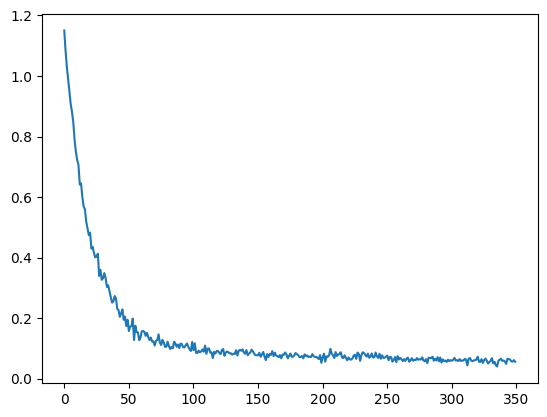

Accuracy: 1.0
Confusion Matrix:
 [[14  0  0]
 [ 0  6  0]
 [ 0  0 18]]


In [ ]:
import torch
import torch.nn as nn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

X_tensor = torch.tensor(X_train, dtype=torch.float32)
y_tensor = torch.tensor(y_train, dtype=torch.long)


class FullyConnected(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(4, 128)  # Input layer to 64 neurons
        self.act1 = nn.ReLU()       # ReLU activation function
        self.l2 = nn.Linear(128, 64) # 64 neurons to 16 neurons
        self.drop = nn.Dropout(0.2) # Dropout for regularization
        self.act2 = nn.ReLU()       # Another ReLU
        self.l3 = nn.Linear(64, 3)  # Output layer to 3 neurons (classes)

    def forward(self, x):
        # Forward pass
        x = self.l1(x)
        x = self.act1(x)
        x = self.l2(x)
        x = self.drop(x)
        x = self.act2(x)
        x = self.l3(x)
        return x

# Move the fit function outside the class definition and correct its arguments
def fit(model, X_train_tensor, y_train_tensor):
    epochs = 350
    loss_arr = []
    loss_fn = nn.CrossEntropyLoss()
    optim = torch.optim.Adam(model.parameters(), lr=0.002)
    for epoch in range(epochs):
        ypred = model(X_train_tensor)
        loss = loss_fn(ypred, y_train_tensor)
        loss_arr.append(loss.item())
        loss.backward()
        optim.step()
        optim.zero_grad()
    plt.plot(loss_arr)
    plt.show()


model = FullyConnected()

# Dynamically set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model.to(device)  # Move model to the chosen device
X_tensor = X_tensor.to(device)  # Move tensors to the chosen device
y_tensor = y_tensor.to(device)

# Call the fit function with the model and the moved tensors
fit(model, X_tensor, y_tensor)

X_ts_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
ytest_pred = model(X_ts_tensor)
newytest = torch.argmax(ytest_pred, dim=1)

from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(newytest.cpu(), y_test))
print("Confusion Matrix:\n", confusion_matrix(newytest.cpu(), y_test))


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/wine-quality-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'wine-quality-dataset' dataset.
Path to dataset files: /kaggle/input/wine-quality-dataset


483
Using device: cpu
Epoch [20/600], Loss: 1.0820
Epoch [40/600], Loss: 0.9603
Epoch [60/600], Loss: 0.8864
Epoch [80/600], Loss: 0.8545
Epoch [100/600], Loss: 0.8132
Epoch [120/600], Loss: 0.7507
Epoch [140/600], Loss: 0.7221
Epoch [160/600], Loss: 0.6781
Epoch [180/600], Loss: 0.6266
Epoch [200/600], Loss: 0.5734
Epoch [220/600], Loss: 0.5364
Epoch [240/600], Loss: 0.4848
Epoch [260/600], Loss: 0.4498
Epoch [280/600], Loss: 0.3961
Epoch [300/600], Loss: 0.3460
Epoch [320/600], Loss: 0.3296
Epoch [340/600], Loss: 0.2856
Epoch [360/600], Loss: 0.2537
Epoch [380/600], Loss: 0.2259
Epoch [400/600], Loss: 0.2033
Epoch [420/600], Loss: 0.1922
Epoch [440/600], Loss: 0.1582
Epoch [460/600], Loss: 0.1506
Epoch [480/600], Loss: 0.1330
Epoch [500/600], Loss: 0.1203
Epoch [520/600], Loss: 0.1055
Epoch [540/600], Loss: 0.0971
Epoch [560/600], Loss: 0.0879
Epoch [580/600], Loss: 0.0818
Epoch [600/600], Loss: 0.0755


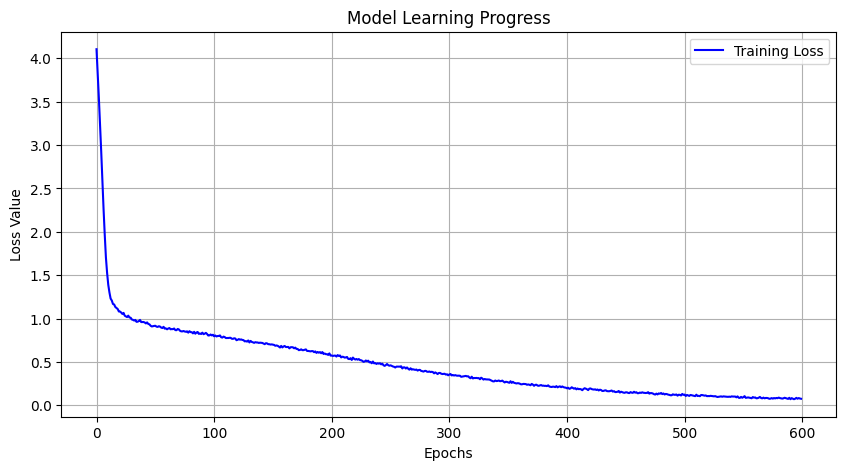

Accuracy: 0.6506550218340611
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  5 75 16  4  0]
 [ 0  0 26 61 16  2]
 [ 0  0  3  6 12  0]
 [ 0  0  0  1  0  1]]


In [ ]:
import os
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv("/kaggle/input/wine-quality-dataset/WineQT.csv")


df['quality'] = df['quality'] - 3
df.head()
print(sum(df['quality']==2))

x = df.drop(['quality','Id'], axis=1).values
y = df['quality'].values


x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

X_tensor = torch.tensor(x_train, dtype=torch.float32)
y_tensor = torch.tensor(y_train, dtype=torch.long)

class FullyConnected(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(11, 255)  # Input layer to 64 neurons
        self.act1 = nn.ReLU()       # ReLU activation function
        self.l2 = nn.Linear(255, 128) # 64 neurons to 16 neurons
        self.drop = nn.Dropout(0.2) # Dropout for regularization
        self.act2 = nn.ReLU()       # Another ReLU
        self.l3 = nn.Linear(128, 64)  # Output layer to 3 neurons (classes)
        self.drop = nn.Dropout(0.2)
        self.act3 = nn.ReLU()
        self.l4 = nn.Linear(64, 6)

    def forward(self, x):
        # Forward pass
        x = self.l1(x)
        x = self.act1(x)
        x = self.l2(x)
        x = self.drop(x)
        x = self.act2(x)
        x = self.l3(x)
        return x

# Move the fit function outside the class definition and correct its arguments
def fit(model, X_train_tensor, y_train_tensor):
    epochs = 600 # Increased for better visualization
    loss_history = []
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.002)

    for epoch in range(epochs):
        # 1. Forward pass
        ypred = model(X_train_tensor)
        loss = loss_fn(ypred, y_train_tensor)

        # 2. Backward pass (The "Learning" part)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 3. Save the loss value
        loss_history.append(loss.item())

        if (epoch + 1) % 20 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    # --- VISUALIZATION ---
    plt.figure(figsize=(10, 5))
    plt.plot(loss_history, label='Training Loss', color='blue')
    plt.title('Model Learning Progress')
    plt.xlabel('Epochs')
    plt.ylabel('Loss Value')
    plt.legend()
    plt.grid(True)
    plt.show()


model = FullyConnected()

# Dynamically set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model.to(device)  # Move model to the chosen device
X_train_tensor = X_tensor.to(device)  # Move tensors to the chosen device
y_train_tensor = y_tensor.to(device)

# Call the fit function with the model and the moved tensors
fit(model, X_train_tensor, y_train_tensor)

X_ts_tensor = torch.tensor(x_test, dtype=torch.float32).to(device)
ytest_pred = model(X_ts_tensor)
newytest = torch.argmax(ytest_pred, dim=1) # Corrected this line to use ytest_pred


print("Accuracy:", accuracy_score(newytest.cpu(), y_test))
print("Confusion Matrix:\n", confusion_matrix(newytest.cpu(), y_test))


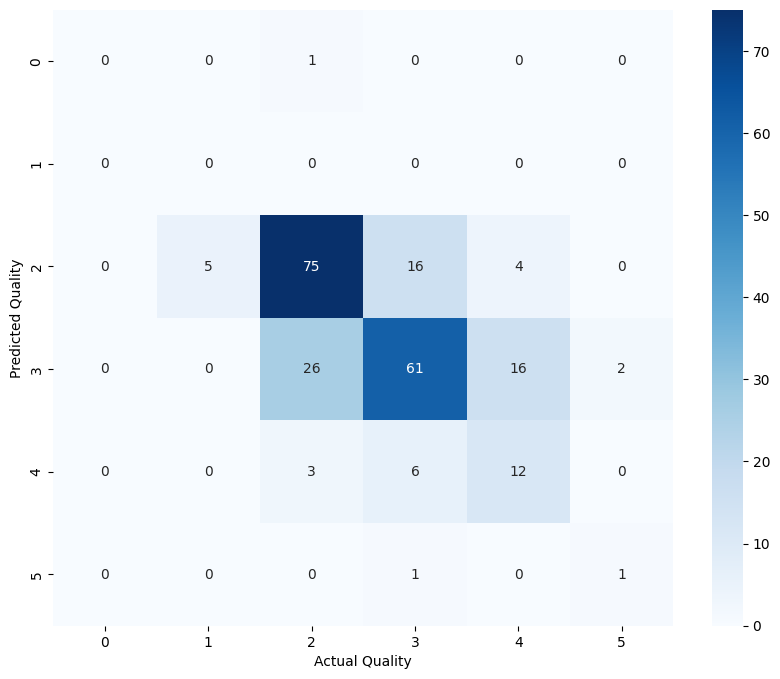

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(newytest.cpu(), y_test), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.show()